In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from linearregression import * # Import my implemtation of Linear Regression
sns.set_theme()

 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [2]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [3]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X[:5])
print(Y[:5])

[[52 93 15]
 [72 61 21]
 [83 87 75]
 [75 88 24]
 [ 3 22 53]]
[[ 478]
 [ 524]
 [ 383]
 [ 584]
 [-197]]


In [4]:
X.shape

(1000, 3)

In [5]:
Y.shape

(1000, 1)

In [6]:
#Generate test data using our function
X_test = np.random.random(size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]

In [7]:
X_test.shape

(50, 3)

In [8]:
Y_true.shape

(50, 1)

In [9]:
W = np.random.randn(X.shape[1], 1) * np.sqrt(2/X.shape[1])
b = 0.0

In [10]:
print(W)

[[ 1.03252392]
 [-0.37817253]
 [-0.65594379]]


In [11]:
linear_regression = LinearRegression()

In [12]:
params, histories = linear_regression.fit(X, Y, W, b,
    optimizer='adam',learning_rate=0.001, epochs=1, batch_size=1, num_iters=100000, bias=True)
W = params['W']
b = params['b']
J_histories = histories['J_histories']
W_histories = histories['W_histories']
b_histories = histories['b_histories']
iterations = histories['iterations']

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 11190066.63725194   
Iteration 10000: Cost 21209511.92263386   
Iteration 20000: Cost 21206178.70851125   
Iteration 30000: Cost 20717874.78575314   
Iteration 40000: Cost 9802508.53689640   
Iteration 50000: Cost 1289747.88503789   
Iteration 60000: Cost 2211.00709108   
Iteration 70000: Cost 0.06532490   
Iteration 80000: Cost 0.04178970   
Iteration 90000: Cost 0.04236102   
Iteration 99999: Cost 0.04238825   


Let us view the weights (coefficients) that our model predicted, we can see that it has nearly accurately computed the weights and
bias (intercept).

In [13]:
W

array([[ 7.0005263],
       [ 2.0005263],
       [-4.9994737]])

In [14]:
b

array([3.0005263])

In [15]:
predictions = linear_regression.predict(X_test, W, b)

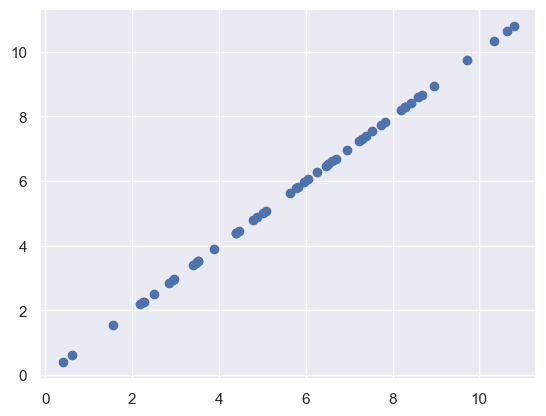

In [16]:
plt.scatter(Y_true, predictions);

In [17]:
W_histories = np.array(W_histories)
W_histories.shape

(1, 11, 3)

In [18]:
J_histories = np.array(J_histories)
J_histories.shape

(1, 11)

In [19]:
b_histories = np.array(b_histories)
b_histories.shape

(1, 11, 1)

In [20]:
jh = J_histories.ravel()
jh

array([1.11900666e+07, 2.12095119e+07, 2.12061787e+07, 2.07178748e+07,
       9.80250854e+06, 1.28974789e+06, 2.21100709e+03, 6.53248952e-02,
       4.17897033e-02, 4.23610238e-02, 4.23882479e-02])

In [21]:
bh = np.ravel(b_histories)
bh

array([31.62277976, 43.02936794, 43.0265371 , 42.60857418, 29.98415581,
       11.91436384,  1.55329108,  2.2841977 ,  2.99952203,  2.99947549,
        3.0005263 ])

In [22]:
iterations = np.array(iterations)
iterations

array([    0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,
       90000, 99999])

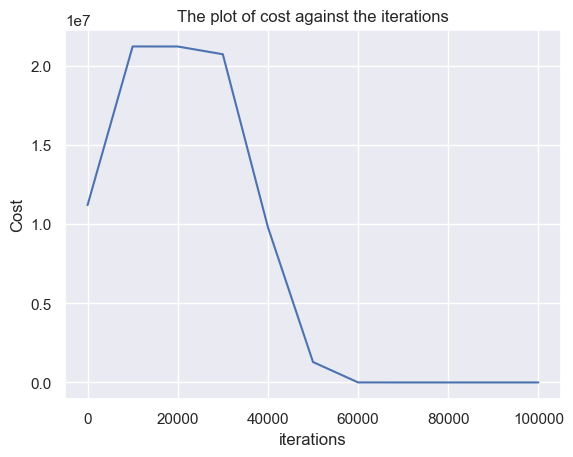

In [24]:
plt.plot(iterations, jh)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();